In [ ]:
import pandas as pd

In [ ]:
!pip install jsonlines

In [ ]:
import jsonlines

In [ ]:
df_llama3_8b_bertaqa_en = pd.read_json('/dss/dsshome1/07/ra47fey2/results/llama-3/bertaqa_en_5-shot.json/meta-llama__Meta-Llama-3-8B/samples_bertaqa_en_2025-03-10T12-35-18.379771.jsonl',lines=True)
df_llama3_8b_bertaqa_eu = pd.read_json('/dss/dsshome1/07/ra47fey2/results/llama-3/bertaqa_eu_5-shot.json/meta-llama__Meta-Llama-3-8B/samples_bertaqa_eu_2025-03-10T12-32-23.247280.jsonl',lines=True)
df_llama31_8b_bertaqa_en = pd.read_json('/dss/dsshome1/07/ra47fey2/results/llama-3.1/bertaqa_en_5-shot.json/meta-llama__Llama-3.1-8B/samples_bertaqa_en_2025-03-10T12-58-08.271359.jsonl',lines=True)
df_llama31_8b_bertaqa_eu = pd.read_json('/dss/dsshome1/07/ra47fey2/results/llama-3.1/bertaqa_eu_5-shot.json/meta-llama__Llama-3.1-8B/samples_bertaqa_eu_2025-03-10T12-55-15.285359.jsonl',lines=True)
df_mistral_7b_bertaqa_en = pd.read_json('/dss/dsshome1/07/ra47fey2/results/mistral/bertaqa_en_5-shot.json/mistralai__Mistral-7B-v0.1/samples_bertaqa_en_2025-03-11T15-09-10.146473.jsonl',lines=True)
df_mistral_7b_bertaqa_eu = pd.read_json('/dss/dsshome1/07/ra47fey2/results/mistral/bertaqa_eu_5-shot.json/mistralai__Mistral-7B-v0.1/samples_bertaqa_eu_2025-03-11T15-06-13.236414.jsonl',lines=True)
df_gemma_7b_bertaqa_en = pd.read_json('/dss/dsshome1/07/ra47fey2/results/gemma/bertaqa_en_5-shot.json/google__gemma-7b/samples_bertaqa_en_2025-03-11T14-59-31.741925.jsonl',lines=True)
df_gemma_7b_bertaqa_eu = pd.read_json('/dss/dsshome1/07/ra47fey2/results/gemma/bertaqa_eu_5-shot.json/google__gemma-7b/samples_bertaqa_eu_2025-03-11T14-56-29.426524.jsonl',lines=True)


In [ ]:
merged = pd.DataFrame()

In [ ]:
# Accuracy data for EU and EN domains for each model
merged["D=EU Llama3-8B"] = df_llama3_8b_bertaqa_eu["acc"]
merged["D=EU Llama3.1-8B"] = df_llama31_8b_bertaqa_eu["acc"]
merged["D=EU Mistral-7B"] = df_mistral_7b_bertaqa_eu["acc"]
merged["D=EU Gemma-7B"] = df_gemma_7b_bertaqa_eu["acc"]

merged["D=EN Llama3-8B"] = df_llama3_8b_bertaqa_en["acc"]
merged["D=EN Llama3.1-8B"] = df_llama31_8b_bertaqa_en["acc"]
merged["D=EN Mistral-7B"] = df_mistral_7b_bertaqa_en["acc"]
merged["D=EN Gemma-7B"] = df_gemma_7b_bertaqa_en["acc"]


In [ ]:
   # plot average accuracy per model
merged_mean = merged.mean()
merged_mean.plot(kind="bar", rot=90, title="Average Accuracy per Model")
display(pd.DataFrame((merged_mean* 100).round(2)))

In [ ]:
merged["group"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["group"] if x["group"] != "Euskal gaiak" else "Gai orokorrak")
merged["difficulty"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["difficulty"])
merged["category"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["category"])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
merged_grouped = merged.groupby("group").mean()

In [ ]:
df_llama3_8b_bertaqa_eu["group"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["group"])
df_llama3_8b_bertaqa_eu["accuracy"] = df_llama3_8b_bertaqa_eu["acc"]  # Accuracy per sample

# Create a mapping of group names from Basque to English
group_translation = {
    "Euskal gaiak": "Basque Issues",
    "Gai orokorrak": "General Issues"
}

# Apply the translation to the 'group' column
df_llama3_8b_bertaqa_eu["group"] = df_llama3_8b_bertaqa_eu["group"].map(group_translation).fillna(df_llama3_8b_bertaqa_eu["group"])

# Compute accuracy by group
accuracy_by_group = df_llama3_8b_bertaqa_eu.groupby("group")["accuracy"].mean().mul(100).round(2)

data= pd.DataFrame(accuracy_by_group)

# Print the result
#print("\nAccuracy by Group:\n", accuracy_by_group)
print(data)

In [35]:
def plot_eus_en_sizes(df_llama3_8b_bertaqa_eu,df_llama31_8b_bertaqa_eu,df_mistral_7b_bertaqa_eu,df_gemma_7b_bertaqa_eu,
                      df_llama3_8b_bertaqa_en,df_llama31_8b_bertaqa_en,df_mistral_7b_bertaqa_en,df_gemma_7b_bertaqa_en):
    merged = pd.DataFrame()

    # Accuracy data for EU and EN domains for each model
    merged["D=EU Llama3-8B"] = df_llama3_8b_bertaqa_eu["acc"]
    merged["D=EU Llama3.1-8B"] = df_llama31_8b_bertaqa_eu["acc"]
    merged["D=EU Mistral-7B"] = df_mistral_7b_bertaqa_eu["acc"]
    merged["D=EU Gemma-7B"] = df_gemma_7b_bertaqa_eu["acc"]
    merged["D=EN Llama3-8B"] = df_llama3_8b_bertaqa_en["acc"]
    merged["D=EN Llama3.1-8B"] = df_llama31_8b_bertaqa_en["acc"]
    merged["D=EN Mistral-7B"] = df_mistral_7b_bertaqa_en["acc"]
    merged["D=EN Gemma-7B"] = df_gemma_7b_bertaqa_en["acc"]



        # Ensure to only compute mean on numeric columns (e.g., accuracy)
    merged_numeric = merged.select_dtypes(include=['float64', 'int64'])
    # plot average accuracy per model
    merged_mean = merged_numeric.mean()
    merged_mean.plot(kind="bar", rot=90, title="Average Accuracy per Model")
    display(pd.DataFrame((merged_mean* 100).round(2)))

    merged["group"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["group"] if x["group"] != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["difficulty"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["difficulty"])
    merged["category"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["category"])

    merged_grouped = merged.groupby("group").mean(numeric_only=True)
    merged_grouped_difficulty = merged.groupby("difficulty").mean(numeric_only=True)
    merged_grouped_category = merged.groupby("category").mean(numeric_only=True)
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    # multiply by 100 and round to 1 decimal place
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))
    
    # add plot that combines group and category
    merged_group_category = merged.groupby(["category", "group"]).mean(numeric_only=True)
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    # merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)
    display((merged_group_category.T * 100).round(2))
    
    # add plot that combines group and difficulty
    merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean(numeric_only=True)
    display((merged_group_difficulty.T * 100).round(2))
    merged_group_difficulty.plot(kind="bar", rot=90, title="Accuracy by Group and Difficulty")

,0
D=EU Llama3-8B,53.30
D=EU Llama3.1-8B,53.74
D=EU Mistral-7B,44.15
D=EU Gemma-7B,53.51
D=EN Llama3-8B,63.50
D=EN Llama3.1-8B,62.45
D=EN Mistral-7B,60.89
D=EN Gemma-7B,61.06


group,Euskal gaiak,Gai orokorrak
D=EU Llama3-8B,43.23,63.25
D=EU Llama3.1-8B,43.49,63.88
D=EU Mistral-7B,37.31,50.92
D=EU Gemma-7B,41.24,65.64
D=EN Llama3-8B,50.21,76.63
D=EN Llama3.1-8B,49.49,75.25
D=EN Mistral-7B,47.38,74.25
D=EN Gemma-7B,46.45,75.50


difficulty,1,2,3
D=EU Llama3-8B,58.01,54.18,46.22
D=EU Llama3.1-8B,58.30,54.18,47.42
D=EU Mistral-7B,46.92,43.68,41.29
D=EU Gemma-7B,59.67,52.57,46.97
D=EN Llama3-8B,70.88,61.92,56.25
D=EN Llama3.1-8B,69.99,61.63,54.00
D=EN Mistral-7B,68.80,60.07,51.98
D=EN Gemma-7B,68.68,59.61,53.33


category,Euskara eta literatura,Geografia eta Historia,Gizartea eta ohiturak,Kirola eta aisialdia,Kultura eta artea,Musika eta dantza,Zientzia eta teknologia,Zinema eta ikuskizunak
D=EU Llama3-8B,54.47,58.83,52.47,47.91,55.08,47.37,56.63,53.60
D=EU Llama3.1-8B,52.85,60.17,52.98,49.58,56.63,45.50,57.31,54.94
D=EU Mistral-7B,43.74,43.67,45.49,39.90,48.19,39.73,47.11,45.56
D=EU Gemma-7B,48.62,56.50,56.39,51.59,54.39,46.86,58.16,55.78
D=EN Llama3-8B,61.95,66.83,66.44,61.10,64.20,53.65,69.90,63.99
D=EN Llama3.1-8B,58.86,68.00,64.91,59.93,61.96,54.33,69.05,62.65
D=EN Mistral-7B,54.96,63.33,66.10,61.60,62.13,50.76,68.71,59.80
D=EN Gemma-7B,56.75,63.00,64.91,57.43,61.79,51.61,71.43,61.81


category         Euskara eta literatura               Geografia eta Historia  \
group                      Euskal gaiak Gai orokorrak           Euskal gaiak   
D=EU Llama3-8B                    47.54         61.29                  48.33   
D=EU Llama3.1-8B                  46.56         59.03                  47.33   
D=EU Mistral-7B                   39.67         47.74                  35.67   
D=EU Gemma-7B                     37.70         59.35                  41.00   
D=EN Llama3-8B                    53.11         70.65                  54.67   
D=EN Llama3.1-8B                  51.48         66.13                  56.00   
D=EN Mistral-7B                   45.25         64.52                  48.67   
D=EN Gemma-7B                     45.90         67.42                  44.67   

category                       Gizartea eta ohiturak                \
group            Gai orokorrak          Euskal gaiak Gai orokorrak   
D=EU Llama3-8B           69.33                 42.56         62.08   
D=EU Llama3.1-8B         73.00                 42.91         62.75   
D=EU Mistral-7B          51.67                 41.87         48.99   
D=EU Gemma-7B            72.00                 45.67         66.78   
D=EN Llama3-8B           79.00                 50.87         81.54   
D=EN Llama3.1-8B         80.00                 50.87         78.52   
D=EN Mistral-7B          78.00                 51.90         79.87   
D=EN Gemma-7B            81.33                 51.21         78.19   

category         Kirola eta aisialdia               Kultura eta artea  \
group                    Euskal gaiak Gai orokorrak      Euskal gaiak   
D=EU Llama3-8B                  40.20         55.45             44.07   
D=EU Llama3.1-8B                41.22         57.76             45.08   
D=EU Mistral-7B                 34.46         45.21             39.66   
D=EU Gemma-7B                   38.18         64.69             39.66   
D=EN Llama3-8B                  45.27         76.57             48.81   
D=EN Llama3.1-8B                43.58         75.91             46.10   
D=EN Mistral-7B                 49.66         73.27             45.76   
D=EN Gemma-7B                   43.92         70.63             43.73   

category                       Musika eta dantza                \
group            Gai orokorrak      Euskal gaiak Gai orokorrak   
D=EU Llama3-8B           66.43             36.33         58.00   
D=EU Llama3.1-8B         68.53             33.91         56.67   
D=EU Mistral-7B          56.99             33.56         45.67   
D=EU Gemma-7B            69.58             38.06         55.33   
D=EN Llama3-8B           80.07             39.79         67.00   
D=EN Llama3.1-8B         78.32             42.21         66.00   
D=EN Mistral-7B          79.02             37.72         63.33   
D=EN Gemma-7B            80.42             37.02         65.67   

category         Zientzia eta teknologia               Zinema eta ikuskizunak  \
group                       Euskal gaiak Gai orokorrak           Euskal gaiak   
D=EU Llama3-8B                     44.52         68.58                  41.95   
D=EU Llama3.1-8B                   46.23         68.24                  44.30   
D=EU Mistral-7B                    41.44         52.70                  32.21   
D=EU Gemma-7B                      47.26         68.92                  42.62   
D=EN Llama3-8B                     59.59         80.07                  49.33   
D=EN Llama3.1-8B                   57.53         80.41                  47.99   
D=EN Mistral-7B                    57.53         79.73                  42.62   
D=EN Gemma-7B                      60.62         82.09                  44.63   

category                        
group            Gai orokorrak  
D=EU Llama3-8B           65.22  
D=EU Llama3.1-8B         65.55  
D=EU Mistral-7B          58.86  
D=EU Gemma-7B            68.90  
D=EN Llama3-8B           78.60  
D=EN Llama3.1-8B         77.26  
D=EN Mistral-7B          76.92 

difficulty                  1                          2                \
group            Euskal gaiak Gai orokorrak Euskal gaiak Gai orokorrak   
D=EU Llama3-8B          47.79         68.08        43.89         64.30   
D=EU Llama3.1-8B        48.39         68.08        42.84         65.33   
D=EU Mistral-7B         38.59         55.12        37.72         49.54   
D=EU Gemma-7B           45.76         73.38        39.81         65.10   
D=EN Llama3-8B          56.87         84.69        47.15         76.43   
D=EN Llama3.1-8B        57.71         82.10        47.03         75.97   
D=EN Mistral-7B         55.32         82.10        45.75         74.14   
D=EN Gemma-7B           53.05         84.10        43.07         75.86   

difficulty                  3                
group            Euskal gaiak Gai orokorrak  
D=EU Llama3-8B          36.68         55.75  
D=EU Llama3.1-8B        38.17         56.65  
D=EU Mistral-7B         35.18         47.38  
D=EU Gemma-7B           37.43         56.50  
D=EN Llama3-8B          45.81         66.67  
D=EN Llama3.1-8B        42.37         65.62  
D=EN Mistral-7B         39.52         64.42  
D=EN Gemma-7B           42.51         64.13

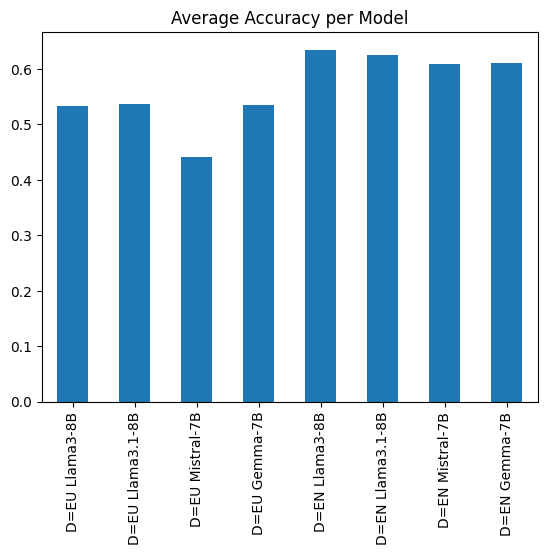

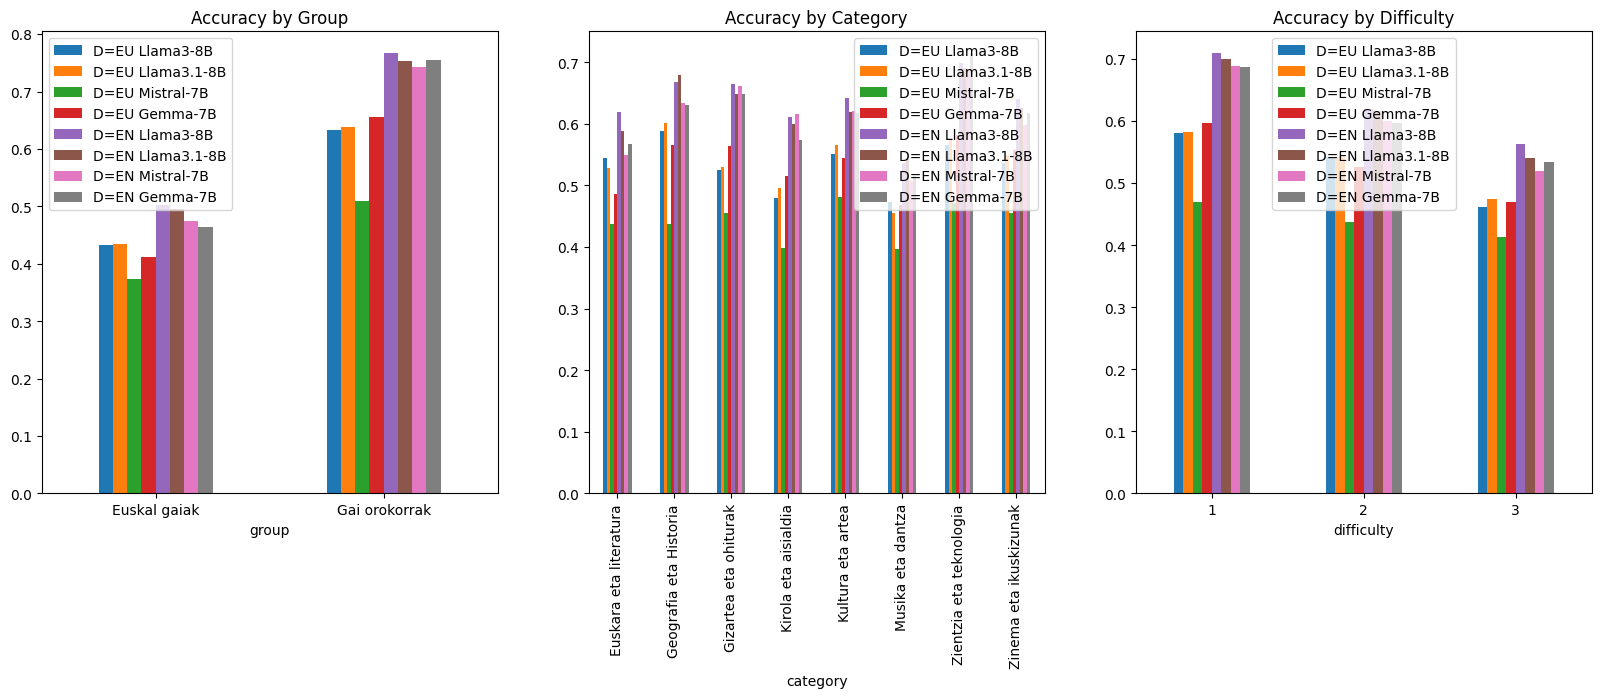

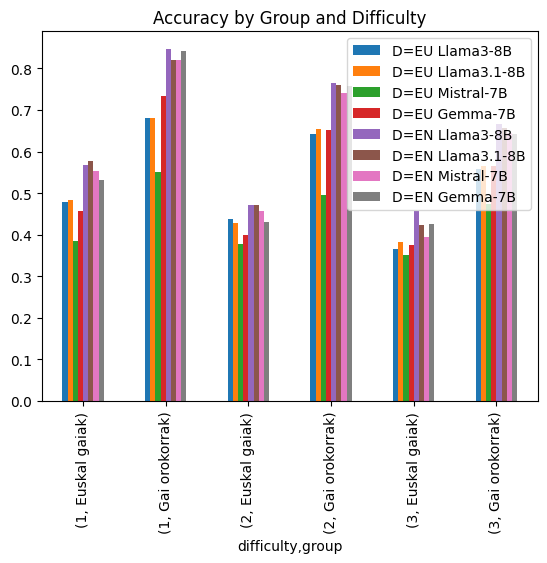

In [36]:
plot_eus_en_sizes(df_llama3_8b_bertaqa_eu,df_llama31_8b_bertaqa_eu,df_mistral_7b_bertaqa_eu,df_gemma_7b_bertaqa_eu,df_llama3_8b_bertaqa_en,df_llama31_8b_bertaqa_en,df_mistral_7b_bertaqa_en,df_gemma_7b_bertaqa_en)

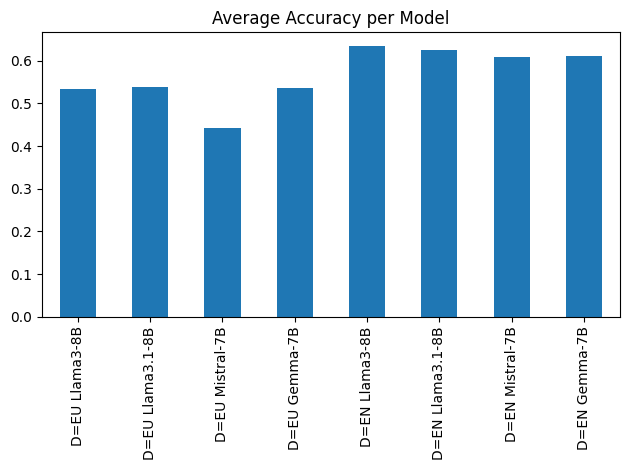

,0
D=EU Llama3-8B,53.30
D=EU Llama3.1-8B,53.74
D=EU Mistral-7B,44.15
D=EU Gemma-7B,53.51
D=EN Llama3-8B,63.50
D=EN Llama3.1-8B,62.45
D=EN Mistral-7B,60.89
D=EN Gemma-7B,61.06


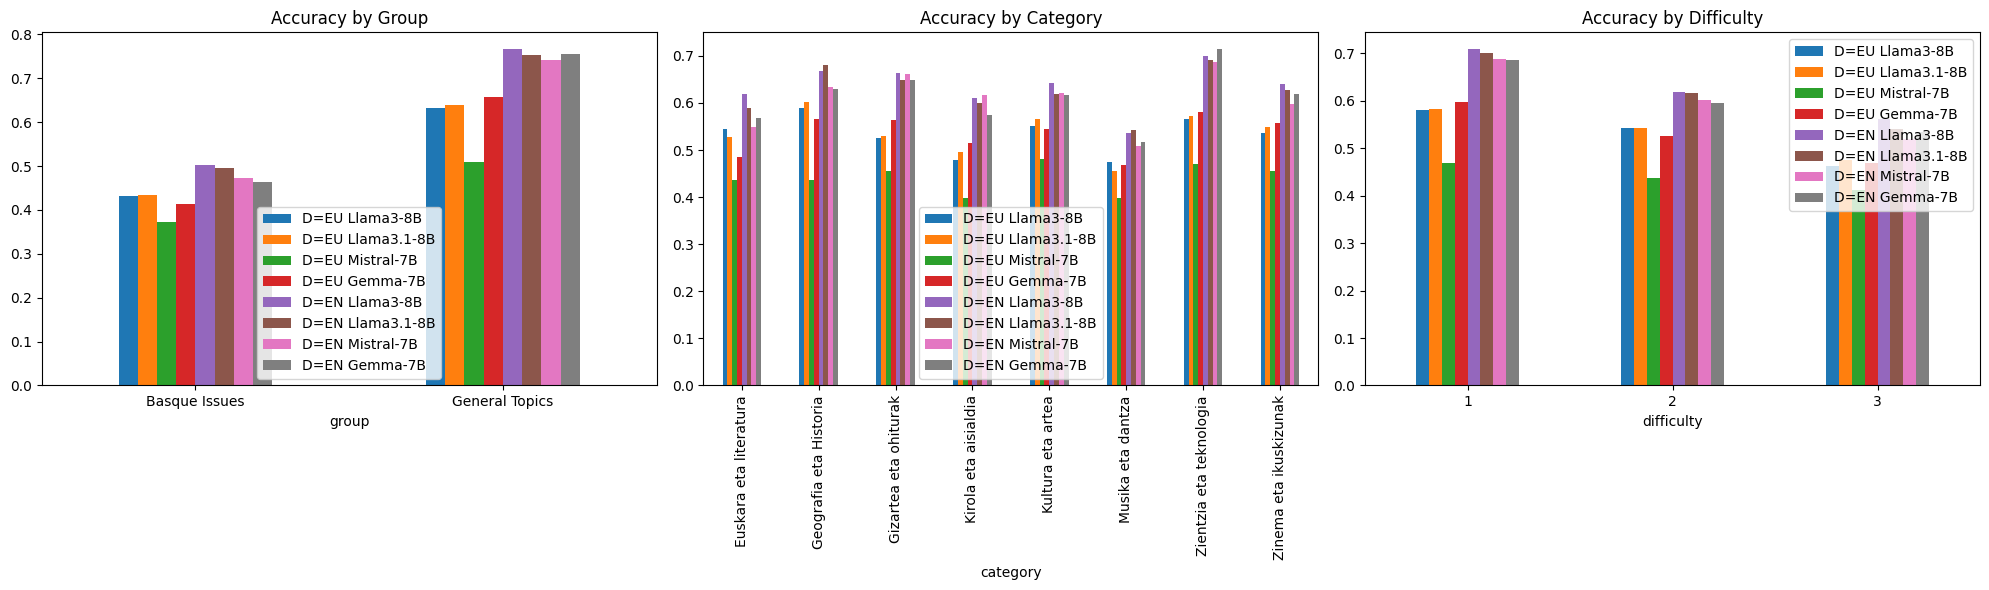

group,Basque Issues,General Topics
D=EU Llama3-8B,43.23,63.25
D=EU Llama3.1-8B,43.49,63.88
D=EU Mistral-7B,37.31,50.92
D=EU Gemma-7B,41.24,65.64
D=EN Llama3-8B,50.21,76.63
D=EN Llama3.1-8B,49.49,75.25
D=EN Mistral-7B,47.38,74.25
D=EN Gemma-7B,46.45,75.50


difficulty,1,2,3
D=EU Llama3-8B,58.01,54.18,46.22
D=EU Llama3.1-8B,58.30,54.18,47.42
D=EU Mistral-7B,46.92,43.68,41.29
D=EU Gemma-7B,59.67,52.57,46.97
D=EN Llama3-8B,70.88,61.92,56.25
D=EN Llama3.1-8B,69.99,61.63,54.00
D=EN Mistral-7B,68.80,60.07,51.98
D=EN Gemma-7B,68.68,59.61,53.33


category,Euskara eta literatura,Geografia eta Historia,Gizartea eta ohiturak,Kirola eta aisialdia,Kultura eta artea,Musika eta dantza,Zientzia eta teknologia,Zinema eta ikuskizunak
D=EU Llama3-8B,54.47,58.83,52.47,47.91,55.08,47.37,56.63,53.60
D=EU Llama3.1-8B,52.85,60.17,52.98,49.58,56.63,45.50,57.31,54.94
D=EU Mistral-7B,43.74,43.67,45.49,39.90,48.19,39.73,47.11,45.56
D=EU Gemma-7B,48.62,56.50,56.39,51.59,54.39,46.86,58.16,55.78
D=EN Llama3-8B,61.95,66.83,66.44,61.10,64.20,53.65,69.90,63.99
D=EN Llama3.1-8B,58.86,68.00,64.91,59.93,61.96,54.33,69.05,62.65
D=EN Mistral-7B,54.96,63.33,66.10,61.60,62.13,50.76,68.71,59.80
D=EN Gemma-7B,56.75,63.00,64.91,57.43,61.79,51.61,71.43,61.81


category         Euskara eta literatura                Geografia eta Historia  \
group                     Basque Issues General Topics          Basque Issues   
D=EU Llama3-8B                    47.54          61.29                  48.33   
D=EU Llama3.1-8B                  46.56          59.03                  47.33   
D=EU Mistral-7B                   39.67          47.74                  35.67   
D=EU Gemma-7B                     37.70          59.35                  41.00   
D=EN Llama3-8B                    53.11          70.65                  54.67   
D=EN Llama3.1-8B                  51.48          66.13                  56.00   
D=EN Mistral-7B                   45.25          64.52                  48.67   
D=EN Gemma-7B                     45.90          67.42                  44.67   

category                        Gizartea eta ohiturak                 \
group            General Topics         Basque Issues General Topics   
D=EU Llama3-8B            69.33                 42.56          62.08   
D=EU Llama3.1-8B          73.00                 42.91          62.75   
D=EU Mistral-7B           51.67                 41.87          48.99   
D=EU Gemma-7B             72.00                 45.67          66.78   
D=EN Llama3-8B            79.00                 50.87          81.54   
D=EN Llama3.1-8B          80.00                 50.87          78.52   
D=EN Mistral-7B           78.00                 51.90          79.87   
D=EN Gemma-7B             81.33                 51.21          78.19   

category         Kirola eta aisialdia                Kultura eta artea  \
group                   Basque Issues General Topics     Basque Issues   
D=EU Llama3-8B                  40.20          55.45             44.07   
D=EU Llama3.1-8B                41.22          57.76             45.08   
D=EU Mistral-7B                 34.46          45.21             39.66   
D=EU Gemma-7B                   38.18          64.69             39.66   
D=EN Llama3-8B                  45.27          76.57             48.81   
D=EN Llama3.1-8B                43.58          75.91             46.10   
D=EN Mistral-7B                 49.66          73.27             45.76   
D=EN Gemma-7B                   43.92          70.63             43.73   

category                        Musika eta dantza                 \
group            General Topics     Basque Issues General Topics   
D=EU Llama3-8B            66.43             36.33          58.00   
D=EU Llama3.1-8B          68.53             33.91          56.67   
D=EU Mistral-7B           56.99             33.56          45.67   
D=EU Gemma-7B             69.58             38.06          55.33   
D=EN Llama3-8B            80.07             39.79          67.00   
D=EN Llama3.1-8B          78.32             42.21          66.00   
D=EN Mistral-7B           79.02             37.72          63.33   
D=EN Gemma-7B             80.42             37.02          65.67   

category         Zientzia eta teknologia                 \
group                      Basque Issues General Topics   
D=EU Llama3-8B                     44.52          68.58   
D=EU Llama3.1-8B                   46.23          68.24   
D=EU Mistral-7B                    41.44          52.70   
D=EU Gemma-7B                      47.26          68.92   
D=EN Llama3-8B                     59.59          80.07   
D=EN Llama3.1-8B                   57.53          80.41   
D=EN Mistral-7B                    57.53          79.73   
D=EN Gemma-7B                      60.62          82.09   

category         Zinema eta ikuskizunak                 
group                     Basque Issues General Topics  
D=EU Llama3-8B                    41.95          65.22  
D=EU Llama3.1-8B                  44.30          65.55  
D=EU Mistral-7B                   32.21          58.86  
D=EU Gemma-7B                     42.62          68.90  
D=EN Llama3-8B                    49.33          78.60  
D=EN Llama3.1-8B                  47.99          77.26  

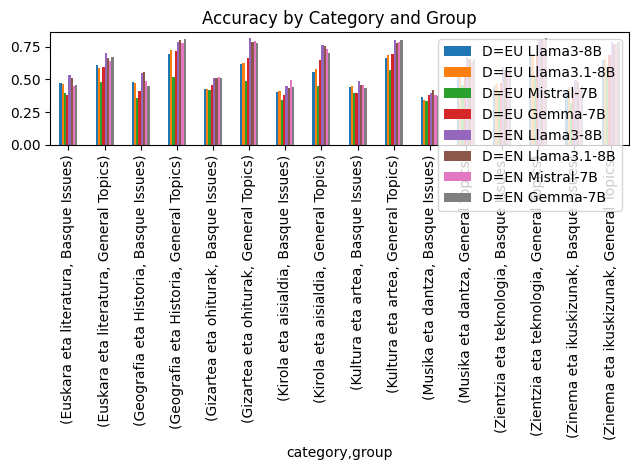

difficulty                   1                            2                 \
group            Basque Issues General Topics Basque Issues General Topics   
D=EU Llama3-8B           47.79          68.08         43.89          64.30   
D=EU Llama3.1-8B         48.39          68.08         42.84          65.33   
D=EU Mistral-7B          38.59          55.12         37.72          49.54   
D=EU Gemma-7B            45.76          73.38         39.81          65.10   
D=EN Llama3-8B           56.87          84.69         47.15          76.43   
D=EN Llama3.1-8B         57.71          82.10         47.03          75.97   
D=EN Mistral-7B          55.32          82.10         45.75          74.14   
D=EN Gemma-7B            53.05          84.10         43.07          75.86   

difficulty                   3                 
group            Basque Issues General Topics  
D=EU Llama3-8B           36.68          55.75  
D=EU Llama3.1-8B         38.17          56.65  
D=EU Mistral-7B          35.18          47.38  
D=EU Gemma-7B            37.43          56.50  
D=EN Llama3-8B           45.81          66.67  
D=EN Llama3.1-8B         42.37          65.62  
D=EN Mistral-7B          39.52          64.42  
D=EN Gemma-7B            42.51          64.13

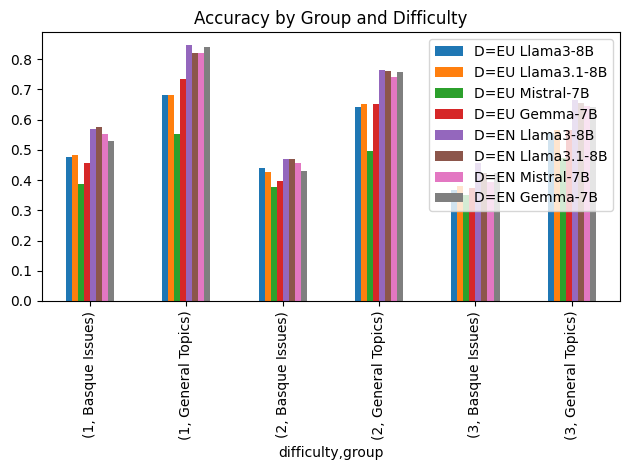

In [41]:
# Create a dictionary to map Basque group names to English
group_translation = {
    "Geografia eta Historia": "Geography and History",
    "Zinema eta ikuskizunak": "Cinema and Entertainment",
    "Euskara eta literatura": "Basque Language and Literature",
    "Nazioarteko gaiak": "International Affairs",
    "Gai orokorrak": "General Topics",
    "Euskal gaiak": "Basque Issues"
}

# Function to translate Basque groups to English
def translate_group(group_name):
    return group_translation.get(group_name, group_name)  # Return original if not found

# Define the plotting function for the four models (llama3(8B), llama3.1(8B), mistral(7B), gemma(7B))
def plot_models(df_llama3_8b_bertaqa_eu, df_llama31_8b_bertaqa_eu, df_mistral_7b_bertaqa_eu, df_gemma_7b_bertaqa_eu,
                df_llama3_8b_bertaqa_en, df_llama31_8b_bertaqa_en, df_mistral_7b_bertaqa_en, df_gemma_7b_bertaqa_en):
    # Merging the accuracy for the models
    merged = pd.DataFrame()
    
    # Accuracy data for EU and EN domains for each model
    merged["D=EU Llama3-8B"] = df_llama3_8b_bertaqa_eu["acc"]
    merged["D=EU Llama3.1-8B"] = df_llama31_8b_bertaqa_eu["acc"]
    merged["D=EU Mistral-7B"] = df_mistral_7b_bertaqa_eu["acc"]
    merged["D=EU Gemma-7B"] = df_gemma_7b_bertaqa_eu["acc"]
    
    merged["D=EN Llama3-8B"] = df_llama3_8b_bertaqa_en["acc"]
    merged["D=EN Llama3.1-8B"] = df_llama31_8b_bertaqa_en["acc"]
    merged["D=EN Mistral-7B"] = df_mistral_7b_bertaqa_en["acc"]
    merged["D=EN Gemma-7B"] = df_gemma_7b_bertaqa_en["acc"]

    # Ensure to only compute mean on numeric columns (e.g., accuracy)
    merged_numeric = merged.select_dtypes(include=['float64', 'int64'])

    # Plot average accuracy per model
    merged_mean = merged_numeric.mean()
    merged_mean.plot(kind="bar", rot=90, title="Average Accuracy per Model")
    plt.tight_layout()
    plt.show()

    # Display the mean accuracies as a DataFrame (in percentage)
    display(pd.DataFrame((merged_mean * 100).round(2)))

    # Assuming 'doc' is a column in the DataFrame that contains nested info like 'group', 'difficulty', 'category'
    merged["group"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: translate_group(x["group"]) if x["group"] != "Nazioarteko gaiak" else "Gai orokorrak")
    merged["difficulty"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["difficulty"])
    merged["category"] = df_llama3_8b_bertaqa_eu["doc"].apply(lambda x: x["category"])

    # Group the merged data by 'group', 'difficulty', and 'category' to calculate average accuracies
    merged_grouped = merged.groupby("group").mean(numeric_only=True)
    merged_grouped_difficulty = merged.groupby("difficulty").mean(numeric_only=True)
    merged_grouped_category = merged.groupby("category").mean(numeric_only=True)

    # Remove difficulty from the group-wise analysis
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)

    # Create subplots for grouped data visualizations
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    plt.tight_layout()
    plt.show()

    # Display the grouped results in percentage (multiplied by 100 and rounded)
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))

    # Group by both 'category' and 'group' and plot combined analysis
    merged_group_category = merged.groupby(["category", "group"]).mean(numeric_only=True)
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    display((merged_group_category.T * 100).round(2))

    # Plot combined group and category performance
    merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    plt.tight_layout()
    plt.show()

    # Group by both 'difficulty' and 'group' and plot combined analysis
    merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean(numeric_only=True)
    display((merged_group_difficulty.T * 100).round(2))
    merged_group_difficulty.plot(kind="bar", rot=90, title="Accuracy by Group and Difficulty")
    plt.tight_layout()
    plt.show()



# Now, plot the data
plot_models(df_llama3_8b_bertaqa_eu, df_llama31_8b_bertaqa_eu, df_mistral_7b_bertaqa_eu, df_gemma_7b_bertaqa_eu,
            df_llama3_8b_bertaqa_en, df_llama31_8b_bertaqa_en, df_mistral_7b_bertaqa_en, df_gemma_7b_bertaqa_en)
